In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

In [159]:
fertilizer = np.array([100, 150, 200, 250, 300, 200, 200, 200, 200, 200, 200, 200, 200, 200])
water = np.array([5, 5, 5, 5, 5, 3, 4, 6, 7, 5, 5, 5, 5, 5])
temperature = np.array([20, 20, 20, 20, 20, 20, 20, 20, 20, 15, 18, 22, 25, 28])

corn_crop = np.array([2.5 ,3.2 ,3.8 ,4.1 ,3.9 ,3.0 ,3.5, 3.9, 3.7, 3.2 ,3.6 ,3.7 ,3.5 ,3.1])

X = np.column_stack((fertilizer, water, temperature))
y = corn_crop


In [161]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

model = LinearRegression()
model.fit(X_poly, y)

def negative_prediction(x):
    x_scaled = scaler.transform([x]) 
    x_poly = poly.transform(x_scaled)
    return -model.predict(x_poly)[0] 



bounds = [(100, 300), (2, 10), (10, 30)] 
initial_guess = [200, 5, 20]  

result = minimize(negative_prediction, x0=initial_guess, bounds=bounds)


optimal_inputs = result.x
optimal_yield = -result.fun


In [173]:
fert_vals = np.linspace(80, 400, 20)
water_vals = np.linspace(2, 10, 20)
temp_vals = np.linspace(10, 40, 20)
fert_mesh, water_mesh, temp_mesh = np.meshgrid(fert_vals, water_vals, temp_vals)


X_grid = np.column_stack((fert_mesh.ravel(), water_mesh.ravel(),temp_mesh.ravel()))
X_grid_scaled = scaler.transform(X_grid)
X_poly_grid = poly.transform(X_grid_scaled)
crop_pred = model.predict(X_poly_grid).reshape(fert_mesh.shape)


In [165]:
feature_names = poly.get_feature_names_out(['fertilizer', 'water', 'temperature'])
for name, coef in zip(feature_names, model.coef_):
    print(f"{name:>30} Coefficient: {coef:>8.5f}")
    
print(f"\nOptimal fertilizer amount: {optimal_inputs[0]:.2f} kg a month")
print(f"Optimal water amount: {optimal_inputs[1]:.2f} liters per day")
print(f"Optimal temperature: {optimal_inputs[2]:.2f}°C\n")
print(f"Maximum predicted corn crop: {optimal_yield:.2f} ton per dunam (0.247 acres)\n\n")



                             1 Coefficient:  0.00000
                    fertilizer Coefficient:  0.39261
                         water Coefficient:  0.16923
                   temperature Coefficient: -0.00459
                  fertilizer^2 Coefficient: -0.09793
              fertilizer water Coefficient:  0.00000
        fertilizer temperature Coefficient: -0.07746
                       water^2 Coefficient: -0.07164
             water temperature Coefficient: -0.03339
                 temperature^2 Coefficient: -0.13619
                  fertilizer^3 Coefficient: -0.02012
            fertilizer^2 water Coefficient:  0.00000
      fertilizer^2 temperature Coefficient:  0.01932
            fertilizer water^2 Coefficient:  0.00000
  fertilizer water temperature Coefficient:  0.00000
      fertilizer temperature^2 Coefficient:  0.01528
                       water^3 Coefficient: -0.00503
           water^2 temperature Coefficient:  0.01414
           water temperature^2 Coefficient:  0

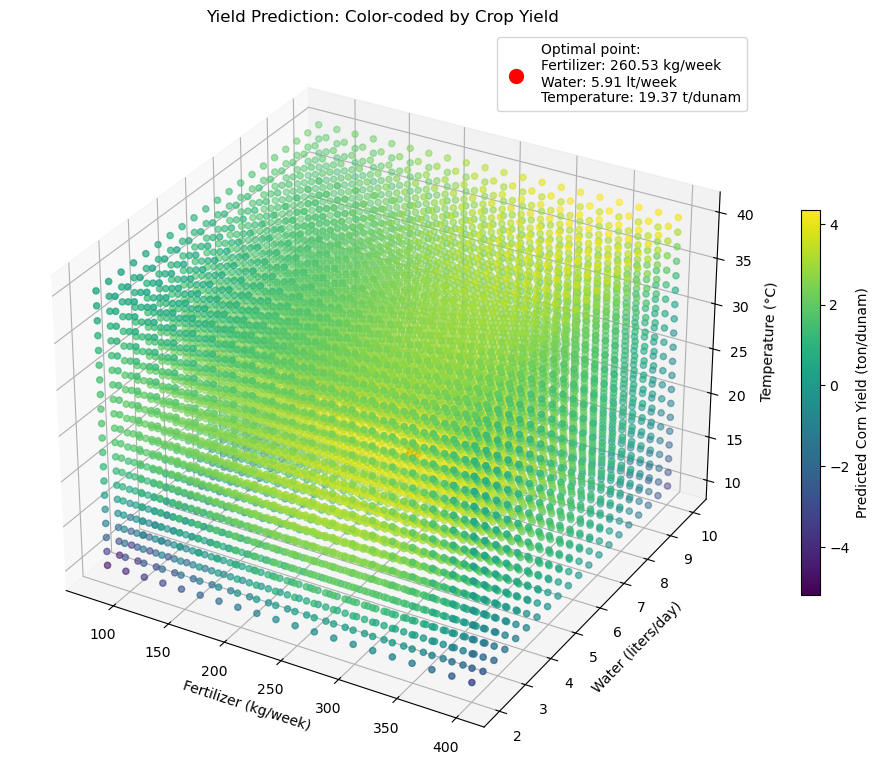

In [175]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(fert_mesh.ravel(), water_mesh.ravel(), temp_mesh.ravel(),
               c=crop_pred, cmap='viridis', marker='o')

ax.scatter([optimal_inputs[0]], [optimal_inputs[1]], [optimal_inputs[2]],
           c='red', s=100, label=f'Optimal point:\
           \nFertilizer: {optimal_inputs[0]:.2f} kg/week\nWater: {optimal_inputs[1]:.2f} lt/week\nTemperature: {optimal_inputs[2]:.2f} t/dunam')

ax.legend()

ax.set_xlabel('Fertilizer (kg/week)')
ax.set_ylabel('Water (liters/day)')
ax.set_zlabel('Temperature (°C)')
ax.set_title('Yield Prediction: Color-coded by Crop Yield')

fig.colorbar(p, ax=ax, shrink=0.5, label='Predicted Corn Yield (ton/dunam)')
plt.show()
